<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/TempSeries_aula2_arima_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CESAR School Recife**

Disciplina: Séries Temporais

Alunos: *Erike Simon, José Aparecido*

**Atividade 2:** Modelagem

* Escolha uma série temporal;
* Aplique o Arima +  2 modelos de aprendizagem de máquina (a sua escolha);
* Realize avaliação de métricas: MSE, MAPE, ... ;
* Criar resumo sobre os resultados.

## modelos ARIMA

In [ ]:
pip install yfinance pydataset pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.4 MB/s eta 0:00:00
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=a006b6c42999f400732007a6cb0ac9113f001e56fd93fe260403d6990c08602d
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


ARIMA não sazonal

In [ ]:
#ARIMA(p=2,d=1,q=2)

$y_t = c + y'_{t-1}w_1 +  y'_{t-2}w_2 + e_t + e_{t-1}q_1 + e_{t-2}q_2$

ARIMA sazonal (SARIMA)

In [ ]:
#ARIMA(p=2,d=1,q=2)(P=2, D=0, Q=1)m=1

$y_t = c + y'_{t-1}w_1 +  y'_{t-2}w_2 + e_t + e_{t-1}q_1 + e_{t-2}q_2
 + y_{t-12}w_3 + y_{t-24}w_4 + e_{t-12}q_3$

Imports e obtenção dos datasets

In [ ]:
import yfinance as yf
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import KPSSTest, auto_arima
from tqdm import tqdm


initiated datasets repo at: /root/.pydataset/


In [ ]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  df = df.history(period='max')
  return df['Close']

id_name = 'ITSA4.SA'
serie_itausa = get_yfinance(id_name)

In [ ]:
df_air = data('AirPassengers')
df_air['date'] = pd.date_range(
    start='1949-01-01', end= '1961-01-01', freq='M'
  )
df_air.set_index('date', inplace=True)
serie_air = df_air['AirPassengers']

Seleção automática dos parâmetros do ARIMA na série airlines




In [ ]:
y = serie_air
auto_arima(y, #X=None,
           start_p=2, start_q=2, max_p=5, max_d=2,
           max_q=5, start_P=1, start_Q=1, max_P=2,
           max_D=1, max_Q=2, max_order=10, m=12,  stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.30 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.07 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.74 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.94 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.39 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.69 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.91 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.99 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.95 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.13 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.11 sec
 ARIMA(3,1,1)(0,1,0

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Seleção automática dos parâmetros do ARIMA na série itausa

In [ ]:
y = serie_itausa
auto_arima(y, #X=None,
           start_p=2, start_q=2, max_p=5, max_d=2,
           max_q=5, start_P=1, start_Q=1, max_P=2,
           max_D=1, max_Q=2, max_order=10, m=1,  stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12033.407, Time=11.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11945.762, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12015.732, Time=1.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12014.231, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11946.319, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12011.993, Time=8.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12011.925, Time=4.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-12017.463, Time=10.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-12037.033, Time=15.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-12020.618, Time=11.82 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-12030.017, Time=17.11 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-12036.156, Time=17.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-12038.152, Time=14.39 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-12023.971, Time=5.26 se

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**Exemplo de indexação**

Se o horizonte de previsão é 2 (meses, por exemplo), não seria justo por exemplo prever o mês 7 com informações do mês 6. Logo, com horizonte 2, para prever o mesmo 7, teriamos que usar informações até o mês 5. para prever o mês 8, deveriam ser utilizadas informações até o mês 6 e assim por diante.

In [ ]:
t = [1,2,3,4,5,6,7,8,9,10]
horizonte = 2
test_size = 3

print(t)
print(f'treino {t[0:-(test_size+(horizonte-1))]}')
print(f'teste {t[-(test_size+(horizonte-1)):]}')
print(f'Momento da Previsão: {[8, 9, 10]}')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
treino [1, 2, 3, 4, 5, 6]
teste [7, 8, 9, 10]



Função principal

In [ ]:
# Função para treino e predição de um modelo baseado em auto.arima para uma série temporal
def arima_fit_predict(ts, m, horizon, test_size):
  ts_train = ts[0:-(test_size+(horizon-1))].values # pois não se deve incluir o horizonte de previsão
  ts_test = ts[-(test_size+(horizon-1)):].values

  # criando o modelo com o conjunto de treino
  model = auto_arima(ts_train, #X=None,
            start_p=2, start_q=2, max_p=5, max_d=2,
            max_q=5, start_P=1, start_Q=1, max_P=2,
            max_D=1, max_Q=2, max_order=10, m=m,
            stepwise=True, trace=True)

  # o predict deve fazer a previsão do mesmo número de linhas (duração de tempo) do conjunto de teste
  direct_predict = model.predict(ts_test.shape[0])

  prevs_h_steps = []

  # A variável 'prevs_h_steps' é uma lista que armazenará as previsões com um horizonte de 'horizon'.
  # O loop 'for' itera sobre o conjunto de teste (ts_test) e a cada iteração, faz uma previsão de 'horizon' períodos à frente.
  # O valor da previsão é armazenado em 'prevs_h_steps' para uso posterior e o modelo é atualizado com o valor real observado (t).
  for t in tqdm(ts_test):
    prevs_h_steps.append(model.predict(horizon)[horizon-1]) # '[horizon-1]' acessa o valor exato do horizonte de previsão desejado.
                                                            # Ocorre porque a função 'model.predict(horizon)' retorna previsões para todos
                                                            # os horizontes e estamos interessados apenas na previsão para o período 'horizon'.

    model.update(t) # Essa linha atualiza o modelo ARIMA com o valor observado 't' no conjunto de teste. Isso é importante porque,
                    # à medida que fazemos previsões passo a passo, queremos que o modelo se ajuste aos dados reais à medida que avançamos no tempo.

  # A função retorna duas séries de previsões: 'prevs_h_steps' que são as previsões com
  # o horizonte especificado e 'direct_predict' que são as previsões diretas. estas duas
  # séries serão comparadas nas celulas posteriores
  return prevs_h_steps[0:test_size], direct_predict[-test_size:]


Modelo SARIMA (m != 0) para série airlines

In [ ]:
# variáveis para função arima_fir_predict()
test_size = 24 # tamanho do teste
m = 12 # sazonalidade, que define o número de observações por período sazonal, se a série for mensal, m geralmente é definido como 12 para representar um ano.
       # é preciso identificar a sazonalidade por testes anteriores
horizon = 1 # O horizonte de previsão, que determina quantos períodos (lags) à frente você deseja prever
ts = serie_air # conjunto de dados

# chamada da função
prevs_h_steps, direct_predict = arima_fit_predict(ts, m, horizon, test_size)

In [ ]:
prevs_6_steps, direct_predict = arima_fit_predict(ts, m, 6, test_size)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=757.714, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.29 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.452 seconds


Plot das séries de previsões relacionada aos dados das airlines

<Axes: xlabel='date'>

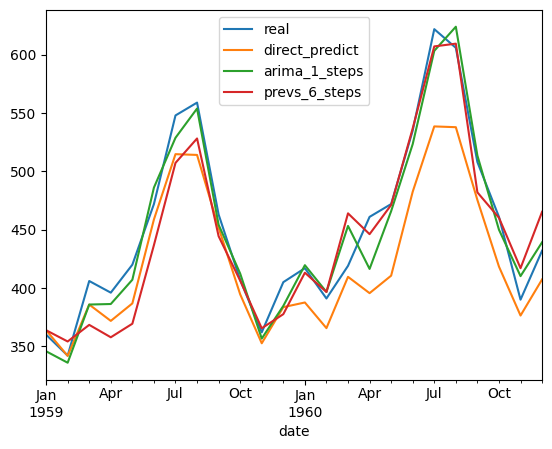

In [ ]:
pd.DataFrame(
    {
        'real': ts.iloc[-test_size:],
        'sarima_direct_predict': direct_predict,
        'sarima_1_steps': prevs_h_steps,
        'sarima_6_steps': prevs_6_steps

    }
).plot()

Observa-se que a previsão direta provoca uma nítida queda de desempenho do modelo quando comparado com os demais. O melhor desempenho ocorre para a previsão de horizonte 1 (gráfico em verde). Para o horizonte 6, os resultados foram razoáveis também.

Modelo ARIMA (m = 0 ou 1) para série airlines

In [ ]:
prevs_1_steps_sem_saz, direct_predict_sem_saz = arima_fit_predict(ts, 1, 1, test_size)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1087.029, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1140.292, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1132.336, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1128.668, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1138.809, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1126.948, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 5.842 seco

<Axes: xlabel='date'>

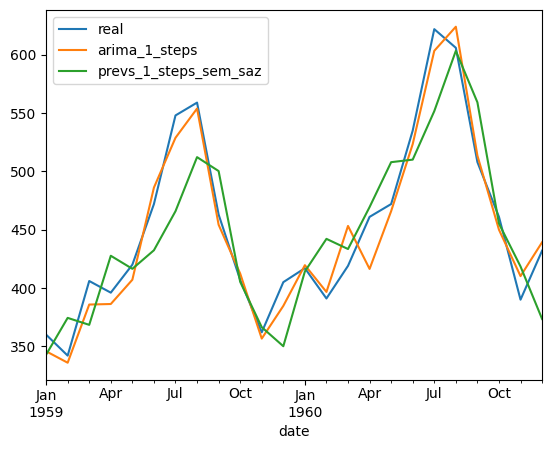

In [ ]:
pd.DataFrame(
    {
        'real': ts.iloc[-test_size:],
        'sarima_1_steps': prevs_h_steps,
        'arima_1_steps': prevs_1_steps_sem_saz
    }
).plot()

Observa-se que o modelo SARIMA performou melhor do que o modelo ARIMA devido as informações sobre sazonalidade.

Modelo SARIMA para série itausa

In [ ]:
serie_itausa.iloc[-1825:]

Date
2016-07-04 00:00:00-03:00    3.840988
2016-07-05 00:00:00-03:00    3.795800
2016-07-06 00:00:00-03:00    3.775716
2016-07-07 00:00:00-03:00    3.805842
2016-07-08 00:00:00-03:00    3.916302
                               ...   
2023-10-23 00:00:00-03:00    8.730000
2023-10-24 00:00:00-03:00    8.780000
2023-10-25 00:00:00-03:00    8.710000
2023-10-26 00:00:00-03:00    8.900000
2023-10-27 00:00:00-03:00    8.730000
Name: Close, Length: 1825, dtype: float64

In [ ]:
test_size = 365 # como o dataset é diário e queremos prever um ano todo, então 365 dias
m = 1
horizon = 1
ts = serie_itausa.iloc[-1825:] # últimos 5 anos de dados
prevs_1_steps_itausa, direct_predict_itausa = arima_fit_predict(ts, m, horizon, test_size)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1724.143, Time=2.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1704.023, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1708.342, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1707.947, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1705.480, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1707.881, Time=2.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1705.824, Time=2.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1722.254, Time=2.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1722.252, Time=3.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1707.268, Time=0.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1712.029, Time=3.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1704.244, Time=2.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1706.180, Time=4.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1725.571, Time=1.05 sec
 ARIMA(1,1,2)(0,0,0

<Axes: xlabel='Date'>

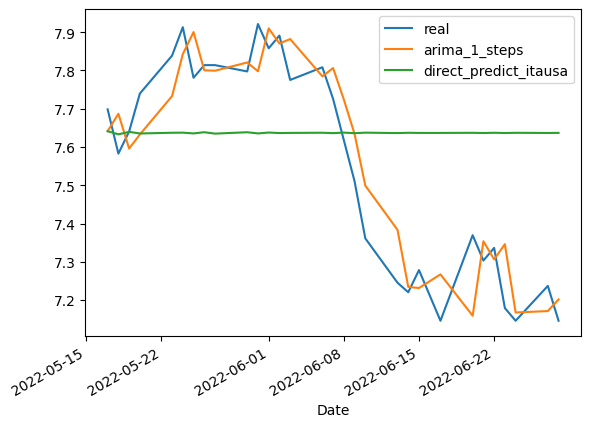

In [ ]:
pd.DataFrame(
    {
        'real': ts.iloc[-test_size:],
        'sarima_1_steps': prevs_1_steps_itausa,
        'direct_predict_itausa': direct_predict_itausa
    }
).iloc[0:30].plot()

Nota-se como uma previsão direta baseada nos dados de 5 anos perde desempenho com relação a previsão de horizonte 1.